In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import altair as alt 
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# To maintain a reasonable scope for the exercise we'll ignore some good practices  

Such as 
* Dividing the samnple to training and testing dtaasets. 
* Cross validation.
* Certain transformations.

Instead, we'll use the entire sample for our models, not transform the variables, and evaluate models only using the _in-sample_ metric _adjusted R$^2$_. 

# A note about `statsmodels.formula.api.ols`

In `statsmodels.formula.api.ols`, when using interaction terms, the default behavior is to include the individual variables of the interaction even if you only specify the interaction term. 

E.g., <br> `formula = 'y ~ x_1 + x_2'` will be regarded as the model $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$ <br> and `formula = 'y ~ x_1 * x_2'` will be regarded as the model $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{1,2} x_1 x_2$  

To override this behavior and include only the interaction terms without the individual variables, you can use the `:` syntax instead of `*` in the formula. 

E.g., <br> `formula = 'y ~ x_1 : x_2'` will be regarded as the model $ y = \beta_0 + \beta_{1,2} x_1 x_2$  <br> `formula = 'y ~ x_2 + x_1 : x_2'` will be regarded as the model $ y = \beta_0 + \beta_2 x_2 + \beta_{1,2} x_1 x_2$ <br> Etc. 

# Read and wrangle the data 

The data are in `Exersice08_insurance.csv`. Read it and prepare it for OLS regression models. 

For this exercise you are allowed to ingnore the column `region`. 

You are also allowed to explore its contribution. A brief and superficial look suggested it might not matter, but it may contain pertinent information after all. In any case, it ia allowed to proceed without it. 

In [6]:
df = pd.read_csv('../data/insurance.csv')
df.sex = np.where(df.sex=='male', 0, 1)
df.smoker = np.where(df.smoker=='yes', 1, 0)

# ... 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


# Plots of `charges` and other variables 

Produce plots of the response variable (`charges`) as a function of other variables. 

Briefly summarize your preliminary observations, e.g., which variables may be useful as main effects (standalone variables) in a model that tries to predict `charges`. 

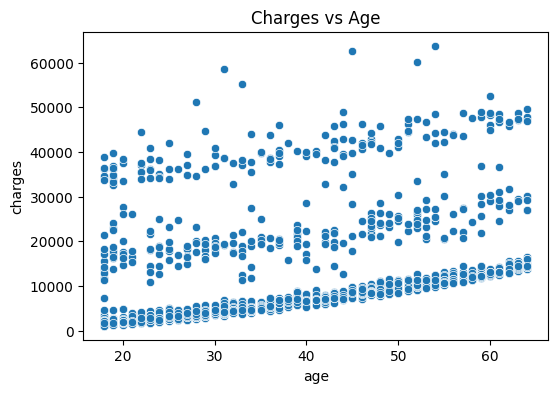

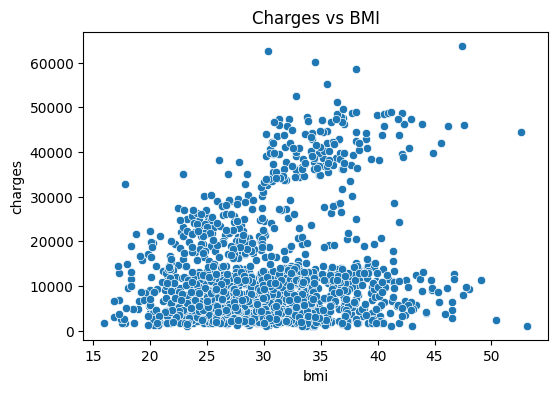

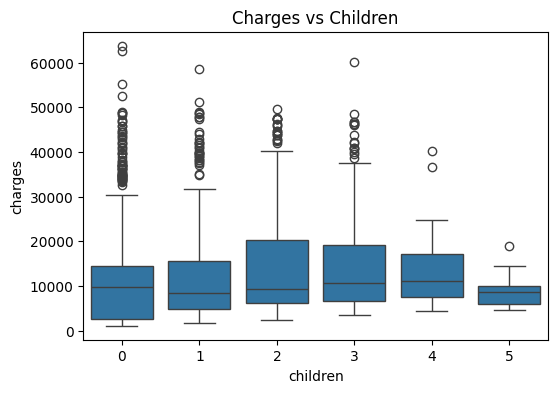

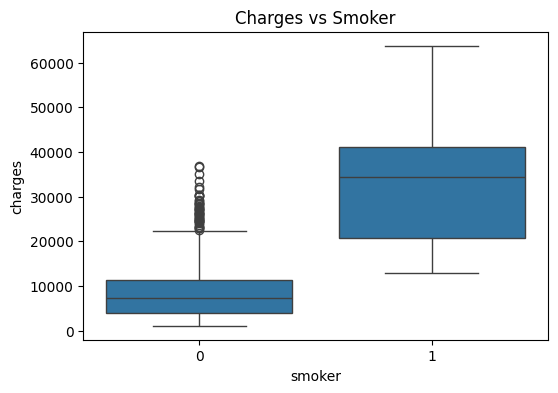

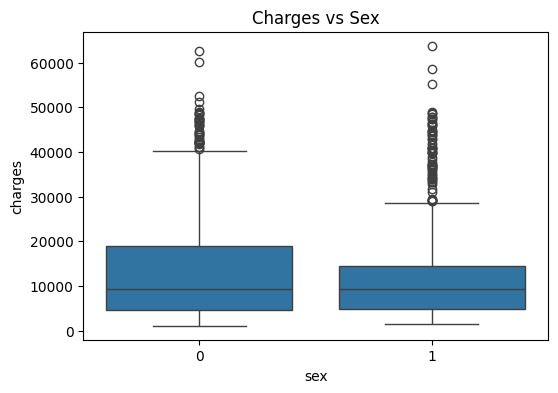

In [10]:
# ... 
import seaborn as sns
import matplotlib.pyplot as plt

# Charges vs age
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Charges vs Age')
plt.show()

# Charges vs BMI
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('Charges vs BMI')
plt.show()

# Charges vs number of children
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='children', y='charges')
plt.title('Charges vs Children')
plt.show()

# Charges vs smoker (0 or 1)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges vs Smoker')
plt.show()

# Charges vs sex
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Charges vs Sex')
plt.show()


### Preliminary observations: 
...

The plot of charges against age shows a slow rise at young ages, and it becomes steeper for older individuals. Many older individuals have higher charges. This suggests that age is a useful main effect.

The plot of charges against BMI shows a loose upward pattern. Most individuals fall in a large cluster with low to moderate charges. A small group has very high charges. Many of these cases also have higher BMI values. This suggests that BMI may contribute to variation in charges. The strength of the effect seems weaker than smoker status.

The plot of charges against the number of children shows little structure. The distributions look similar across all family sizes. There is no clear trend. This suggests that children may have a limited role in predicting charges.

The plot of charges against smoker status shows a large and sharp split. Smokers have much higher charges. The two groups almost form separate clouds. This suggests that smoker status is likely to be one of the strongest predictors in any model.

The plot of charges against sex shows only small differences between males and females. The distributions overlap almost completely. This suggests that sex may not contribute much predictive value by itself.

# Naively attempt to flush out the separate clusters using visualizations

Since the `charges` do seem to be `age` dependent, produce plots of `charges` as a function of `age` where the a color encoding is used to separate data points based on other variables. 

Briefly note if any variable in particular seems to affect the `charges` of people with the same `age`. 

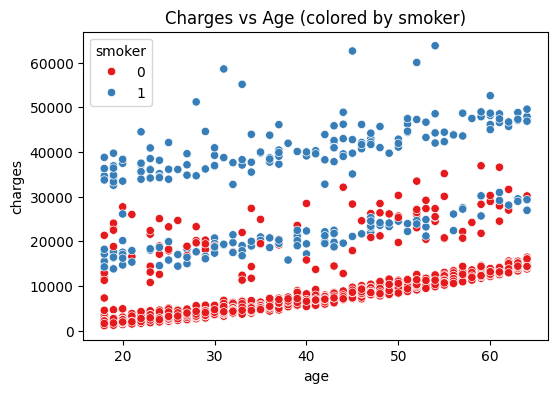

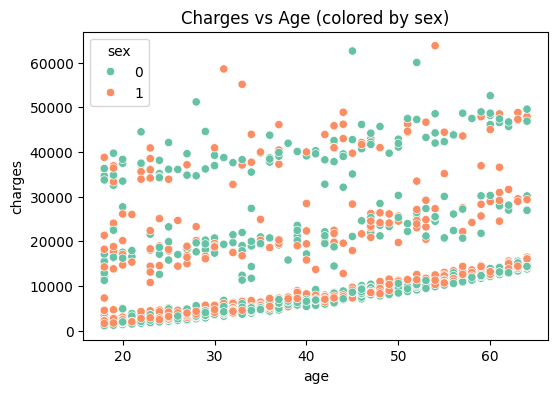

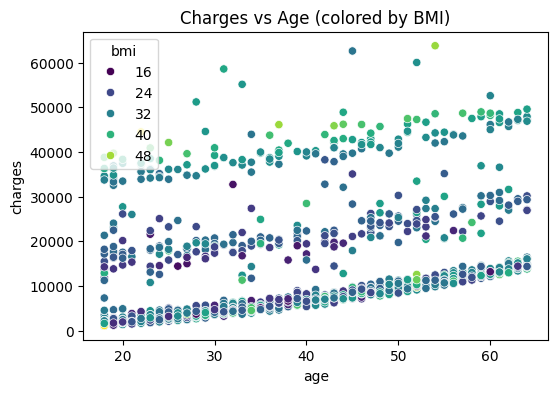

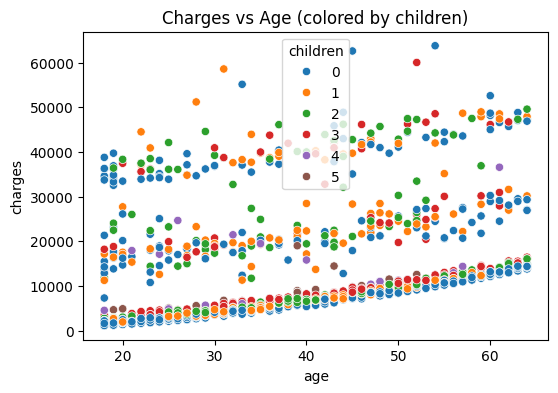

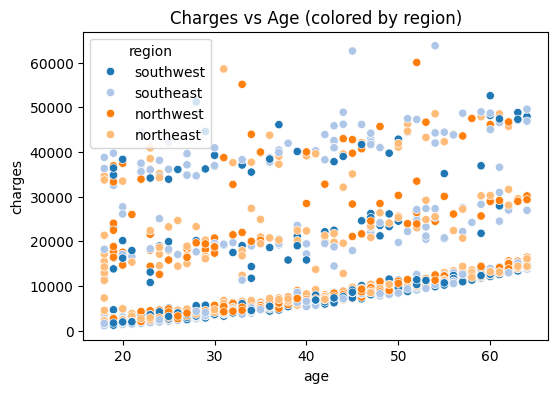

In [12]:
# ... 
# Charges vs Age, colored by smoker
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='Set1')
plt.title('Charges vs Age (colored by smoker)')
plt.show()

# Charges vs Age, colored by sex
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='charges', hue='sex', palette='Set2')
plt.title('Charges vs Age (colored by sex)')
plt.show()

# Charges vs Age, colored by BMI (continuous)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='charges', hue='bmi', palette='viridis')
plt.title('Charges vs Age (colored by BMI)')
plt.show()

# Charges vs Age, colored by number of children
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='charges', hue='children', palette='tab10')
plt.title('Charges vs Age (colored by children)')
plt.show()

# Charges vs Age, colored by region (optional)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='charges', hue='region', palette='tab20')
plt.title('Charges vs Age (colored by region)')
plt.show()


...

### **Observations from the color-coded plots**

Coloring the points by smoker status produces the clearest separation. Smokers have much higher charges at almost every age. The gap is large even when smokers and non-smokers are the same age. This suggests that smoking has a strong effect that does not come from age alone.

Coloring by BMI shows a mild trend. Higher BMI values appear more often among people with higher charges. The effect is visible but not sharp. The separation is weaker than the difference between smokers and non-smokers.

Coloring by sex shows heavy overlap. People of the same age have similar charges regardless of sex. The effect of sex appears small.

Coloring by children does not reveal structure. Points from different family sizes overlap at almost all ages. Children do not seem to shift charges in a clear way.

Coloring by region also gives heavy overlap. The clusters do not change across regions. Region seems to have a limited effect.

Among all variables, smoker status is the only one that clearly shifts charges upward while holding age fixed.


# Separate the plots further by other variables 

You can use another encoding, such as `column`, if you wish. 

Briefly summarize your conclusions. 


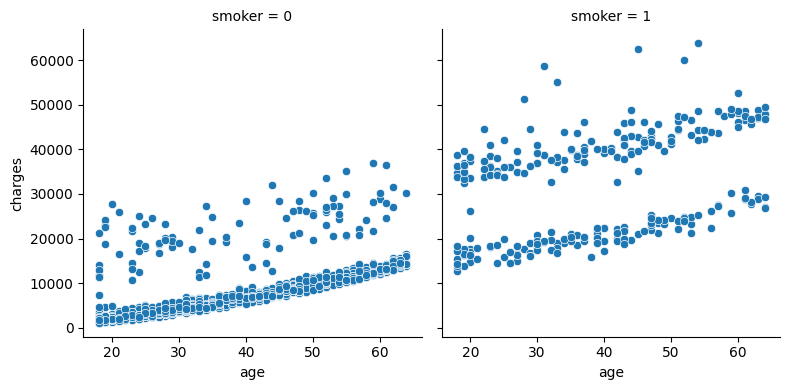

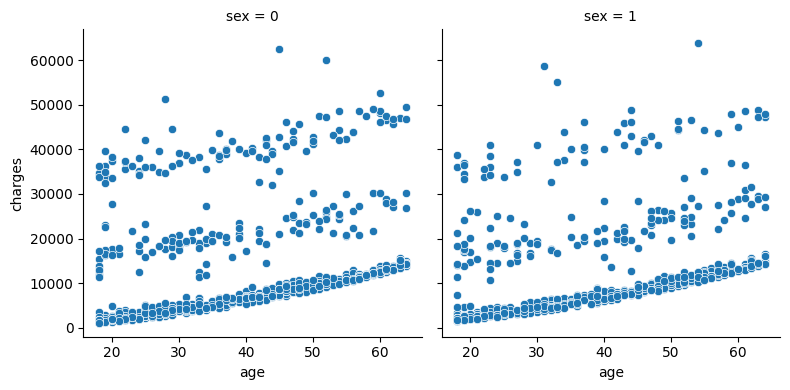

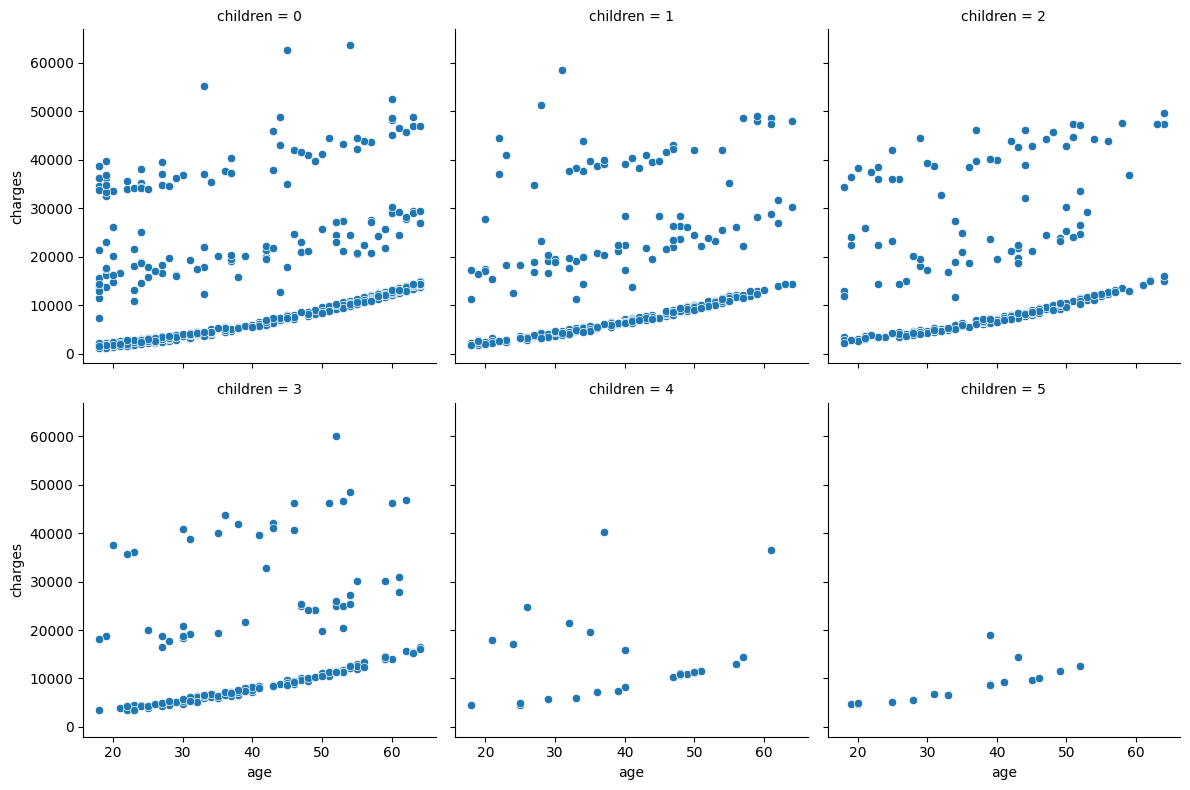

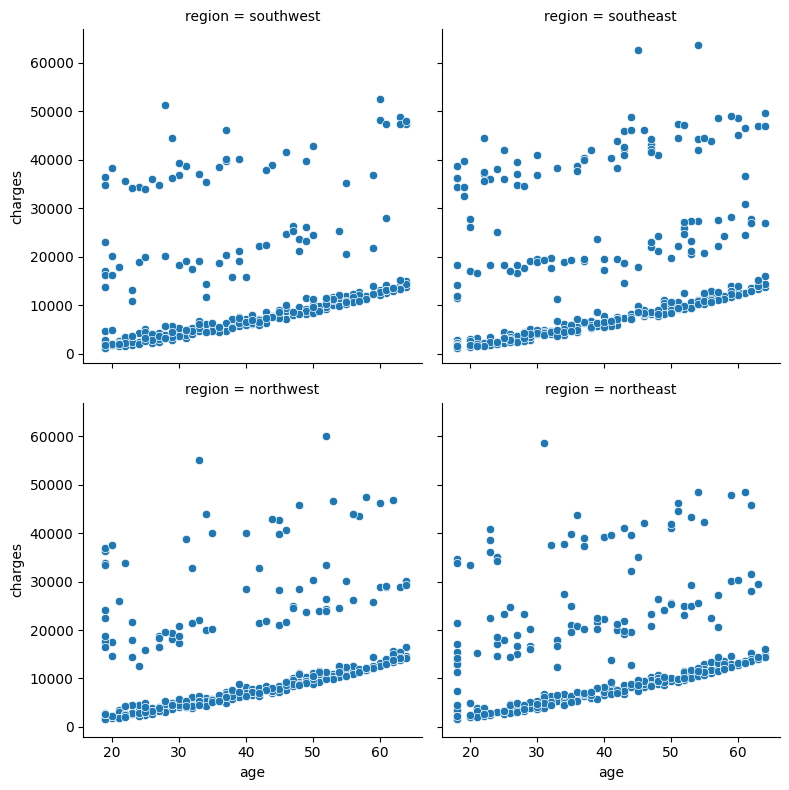

In [13]:
# ... 

# Facet by smoker status
sns.relplot(
    data=df,
    x="age",
    y="charges",
    col="smoker",
    kind="scatter",
    height=4,
    aspect=1
)
plt.show()


# Facet by sex  
sns.relplot(
    data=df,
    x="age",
    y="charges",
    col="sex",
    kind="scatter",
    height=4,
    aspect=1
)
plt.show()

# Facet by number of children
sns.relplot(
    data=df,
    x="age",
    y="charges",
    col="children",
    kind="scatter",
    col_wrap=3,
    height=4,
    aspect=1
)
plt.show()

# Facet by region
sns.relplot(
    data=df,
    x="age",
    y="charges",
    col="region",
    kind="scatter",
    col_wrap=2,
    height=4,
    aspect=1
)
plt.show()



### **Summary of faceted plots**

The panels make the differences easier to see. The smoker panels show two clear patterns. Non-smokers have much lower charges. Smokers have much higher charges. The gap is large at every age. This confirms that smoking has a strong effect that age alone cannot explain.

The sex panels look almost the same. The spreads and shapes match across both groups. Sex does not appear to change charges once age is fixed.

The children panels also look similar. The patterns for zero through five children show the same vertical structure. There is no clear separation across these groups. The number of children does not shift charges by much.

The region panels also show heavy overlap. The shapes and spreads look similar for all four regions. Region does not appear to explain the clusters that we saw earlier.

The only variable that creates a clear and consistent shift in charges for people of the same age is smoker status.


### Preliminary conclusions

...

The visual patterns point to one dominant driver of charges. Smokers have much higher charges than non-smokers at every age. The separation is large and stable. This effect does not depend on age, sex, children, or region. None of the other variables create clear clusters when age is held fixed.


BMI shows a mild upward trend, but the structure is loose. Sex shows almost complete overlap. Children show no strong trend. Region shows little separation. These variables may still help in a model, but their influence appears limited in a simple plot.
Smoking stands out as the variable most likely to play a major role in any model that tries to predict charges.


# A sidenote on transformations (this is not a prompt, just FYI) 

The following plots suggest that transforming charges would give a better model. 

To keep things simple, we'll stick with the original variables. 

In [14]:


age_charges1 = alt.Chart(df).mark_circle().encode(
    x=alt.X("age:Q"),
    y=alt.Y("charges:Q")
).properties(
        width=250,
        height=250,
        title="linear"
    )
age_charges2 = alt.Chart(df).mark_circle().encode(
    x=alt.X("age:Q"),
    y=alt.Y("charges:Q").scale(type="log")
).properties(
        width=250,
        height=250,
        title="semi-log y"
    )
age_charges3 = alt.Chart(df).mark_circle().encode(
    x=alt.X("age:Q").scale(type="log"),
    y=alt.Y("charges:Q").scale(type="log")
).properties(
        width=250,
        height=250,
        title="log-log"
    )
reg1 = alt.Chart(df).transform_filter(
    (alt.datum.charges < alt.datum.age*250+3000) 
).transform_regression(
    'age', 'charges'
).mark_line(color='orange').encode(
    x='age:Q',
    y='charges:Q'
)
reg2 = alt.Chart(df).transform_filter(
    (alt.datum.charges > alt.datum.age*250+3000) & (alt.datum.charges < 30800)
).transform_regression(
    'age', 'charges'
).mark_line(color='red').encode(
    x='age:Q',
    y='charges:Q'
)
reg3 = alt.Chart(df).transform_filter(
    (alt.datum.charges >= 30800) 
).transform_regression(
    'age', 'charges'
).mark_line(color='green').encode(
    x='age:Q',
    y='charges:Q'
)

(age_charges1+reg1+reg2+reg3 | 
 age_charges2+reg1+reg2+reg3 | 
 age_charges3+reg1+reg2+reg3).display()


alt.HConcatChart(...)

# Model$_0$: $ \text{charges} \sim \text{age} $

This model is so simple that it can be visualized in an Altair chart without implementing it first using `sklearn` or `statsmodels`.  

Altair can create regression lines using the `transform_regression()` method. 

Create a plot with two layers:
1. A scatter plot of `charges` as a function of `age`
2. A regression line that depicts model$_0$

In [15]:
# ...
import altair as alt

# Scatter layer
scatter = alt.Chart(df).mark_circle(size=30, opacity=0.5).encode(
    x=alt.X("age:Q", title="age"),
    y=alt.Y("charges:Q", title="charges")
)

# Regression line layer
reg_line = alt.Chart(df).transform_regression(
    'age', 'charges'
).mark_line(color='red').encode(
    x='age:Q',
    y='charges:Q'
)

(scatter + reg_line).properties(
    width=400,
    height=300,
    title="Model₀: charges ~ age"
)


alt.LayerChart(...)

### Obvisously, model$_0$ is not satisfactory. 


From now on, the workflow will consist of fitting the model and using it for predictions with 'statsmodels'. 


# Model$_1$: $ \text{charges} \sim \text{age} + \text{smoker} $

1. Fit this model using `statsmodels`
2. Predict the charges using the fitted model.
3. Display the model summary (`statsmodels` models have a `summary()` method).
4. Produce a two layer scatter plot where one layer shows the raw data (`charges` as a function of `age`) and the other shows the predictions (`predicted_charges` as a function of `age`). 


In [17]:

# ...
# Fit Model_1
model1 = smf.ols('charges ~ age + smoker', data=df).fit()
df['predicted_model1'] = model1.predict(df)
print(model1.summary())



                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Sat, 22 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:25:03   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2391.6264    528.302     -4.527      0.0

In [ ]:
import altair as alt


df_sorted = df.sort_values(['smoker', 'age'])


scatter_raw = alt.Chart(df_sorted).mark_circle(size=30, opacity=0.4).encode(
    x=alt.X('age:Q', title='age'),
    y=alt.Y('charges:Q', title='charges'),
)

line_pred = alt.Chart(df_sorted).mark_line().encode(
    x='age:Q',
    y='predicted_model1:Q',
    color='smoker:N',        
    detail='smoker:N'       
)

(scatter_raw + line_pred).properties(
    width=400,
    height=300,
    title='Model₁: charges ~ age + smoker'
)


alt.LayerChart(...)

### Model$_1$ clearly improves on model$_0$. 

Would an interaction between `age` and `smoker` help?  **Presumably yes, because this forces both smokers and non-smokers to have the same slope with respect to age. The only difference is a vertical shift.**

<br> 

# Model$_2$: $ \text{charges} \sim \text{age} + \text{smoker} + \text{age} \times \text{smoker} $

1. Fit this model using `statsmodels`
2. Predict the charges using the fitted model.
3. Display the model summary (`statsmodels` models have a `summary()` method).
4. Produce a two layer scatter plot where one layer shows the raw data (`charges` as a function of `age`) and the other shows the predictions (`predicted_charges` as a function of `age`). 


In [25]:
# ... 
model2 = smf.ols('charges ~ age + smoker + age:smoker', data=df).fit()
df['predicted_model2'] = model2.predict(df)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1153.
Date:                Sat, 22 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:32:34   Log-Likelihood:                -13622.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1334   BIC:                         2.727e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2091.4206    582.565     -3.590      0.0

In [26]:
df_sorted = df.sort_values(['smoker', 'age'])


scatter_raw = alt.Chart(df_sorted).mark_circle(size=30, opacity=0.4).encode(
    x=alt.X('age:Q', title='age'),
    y=alt.Y('charges:Q', title='charges')
)

line_pred = alt.Chart(df_sorted).mark_line().encode(
    x='age:Q',
    y='predicted_model2:Q',
    color='smoker:N',
    detail='smoker:N'
)

(scatter_raw + line_pred).properties(
    width=400,
    height=300,
    title='Model₂: charges ~ age + smoker + age×smoker'
)


alt.LayerChart(...)

# Develop the model until further complications don't improve the adjusted R$^2$ much.   

You can add main effect variables and/or interaction terms, but grow the model rather _slowly_ - take $2$-$4$ more steps before you settle on your model of choice.  






# Model$_3$: ...



In [29]:
# ... 
model3 = smf.ols('charges ~ age + smoker + bmi', data=df).fit()
df['predicted_model3'] = model3.predict(df)
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 22 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:34:09   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.168e+04    937.569    -12.454      0.0



# Model$_4$: ...



In [30]:
# ... 
model4 = smf.ols('charges ~ age + smoker + bmi + children', data=df).fit()
df['predicted_model4'] = model4.predict(df)
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sat, 22 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:34:13   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.21e+04    941.984    -12.848      0.0

### Quick interpretation

Adding BMI in Model₃ gives a clear improvement. The adjusted R² rises from about 0.72 to about 0.75. This tells us that BMI explains important variation in charges that age and smoking could not capture. The BMI coefficient is large and highly significant. Smokers still have the largest shift, and age remains positive and strong.


Adding children in Model₄ gives a small improvement. The adjusted R² rises only slightly from about 0.747 to about 0.749. The effect of children is positive but modest. The other coefficients stay about the same. This means that children matter a little, but they do not change the overall structure of the model.


The main conclusion is that smoking, BMI, and age drive most of the variation in charges. Children add only a small amount. The interaction between age and smoking did not help, because the slopes for smokers and non-smokers are similar.

# Consider the following plots

What does the plot reveal about the the relation between charges, smoking, and BMI?


In [31]:
alt.Chart(
    df[df.smoker==1]
).mark_circle(
    size=60
).encode(
    x='age:Q',
    y='bmi:Q',
    color=alt.condition(
        alt.datum.charges > 31000, # higest charges bracket 
        alt.value('orange'),     
        alt.value('steelblue')   
    )
).display() 


alt.Chart(...)

...

<br> 

### **Interpretation**

The plot shows only smokers. The points are colored by charges. Orange points have very high charges. Blue points have lower charges. The orange points cluster in the upper part of the figure. This region corresponds to higher BMI values. The blue points appear mostly in the lower BMI range.

Age does not create strong separation inside this group. People of many ages show high charges when their BMI is high. People with lower BMI rarely show high charges. The shape suggests that BMI is a strong driver of variation inside the smoker group. Smoking already raises charges by a large amount. BMI then adds another layer of risk on top of this shift.

The plot supports the regression results. BMI has a clear positive effect. The effect is visible even after we hold smoking status fixed.


# Bin the `charges` and visualize the uncertainties within each group 

* Standardized ages can be binned as $\in [-1.5, -0.5)$, $[-0.5, 0.5)$, or $[0.5, 1.5)$ (more extreme values can be ignnored).

* Based on your model and the plot above, each of the three age groups can be divided to non-smokers, smokers with below average BMIs, and smokers with above average BMIs.  

* It is convenient to add a `Group` column ('Non Smokers', 'Smokers, BMI < avg', 'Smokers, BMI > avg') and an `Age Group` ('Younger', 'Mid range age', 'Older') to the DataFrame rather than implementing everything in the Altair Charts.
 
## Visualize the uncertainties of each of the $9$ groups using **two** types of plots 

There are various ways to graphically depict uncertainty: the ones simpler to implement are bar plots with error bars and box plots. Violin plots and beeswarm plots require some manipulations of the DataFrame and/or the chart. Please consult the [Altair-Vega Example Gallery](https://altair-viz.github.io/gallery/index.html#example-gallery) if you need inspiration. Choose any two types of plots that you happen to prefer for any reason. 

**Note:** for this question you are _specifically allowed_ to use AI generated code to troubleshoot.   


In [33]:
scaler = StandardScaler()

# Standardized versions of age and bmi
df[['age_std', 'bmi_std']] = scaler.fit_transform(df[['age', 'bmi']])


df = df[(df.age_std>=-1.5) & (df.age_std<1.5)]

df.loc[:,'Group'] = 'Non Smokers'
df.loc[(df.smoker==1) & (df.bmi_std<=0), 'Group'] = 'Smokers, BMI < avg'  
df.loc[(df.smoker==1) & (df.bmi_std>0), 'Group'] = 'Smokers, BMI > avg'  

df.loc[:,'Age Group'] = 'Younger'
df.loc[(df.age_std>=-0.5) & (df.age_std<0.5), 'Age Group'] = 'Mid range age' 
df.loc[(df.age_std>=0.5) & (df.age_std<1.5), 'Age Group'] = 'Older' 

# ...



/var/folders/vp/npcvxcc52xqfjgmswcdds6yc0000gn/T/ipykernel_82966/600713580.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Group'] = 'Non Smokers'
/var/folders/vp/npcvxcc52xqfjgmswcdds6yc0000gn/T/ipykernel_82966/600713580.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Age Group'] = 'Younger'


In [35]:
# mean charge, standard error, standard deviation, sample size for each of the nine groups

group_stats = (
    df.groupby(['Age Group', 'Group'])
      .agg(
          mean_charge=('charges', 'mean'),
          sd=('charges', 'std'),
          n=('charges', 'count')
      )
      .reset_index()
)

group_stats['se'] = group_stats['sd'] / np.sqrt(group_stats['n'])


In [36]:
# Plot 1: Bar chart with error bars

bar = alt.Chart(group_stats).mark_bar().encode(
    x=alt.X('Age Group:N', title='Age Group'),
    y=alt.Y('mean_charge:Q', title='Mean Charges'),
    color='Group:N'
)

error = alt.Chart(group_stats).mark_errorbar().encode(
    x='Age Group:N',
    y=alt.Y('mean_charge:Q', title='Mean Charges', scale=alt.Scale(zero=False)),
    color='Group:N'
)

(bar + error).properties(
    width=300,
    height=250,
    title='Mean Charges with Standard Error Bars by Age and Smoking–BMI Group'
)


alt.LayerChart(...)

In [37]:
# Plot 2: Box plot for the same 9 groups

box = alt.Chart(df).mark_boxplot().encode(
    x=alt.X('Age Group:N', title='Age Group'),
    y=alt.Y('charges:Q', title='Charges'),
    color='Group:N'
).properties(
    width=300,
    height=250,
    title='Charge Distributions by Age and Smoking–BMI Group'
)

box


alt.Chart(...)

### Interpretation of the uncertainty plots

The bar plot shows that **mean charges increase in a consistent pattern across the three smoking–BMI groups**. Non-smokers have the lowest mean charges in every age group. Smokers with below average BMI fall in the middle. Smokers with above average BMI have the highest values. The standard error bars are small compared to the differences between groups. This suggests that the separation across these groups is stable and not driven by random noise.

The box plot shows **the full distribution of charges inside each of the nine groups**. It confirms the layering seen in the bar plot. The median charges of smokers with high BMI remain well above the other groups for every age range. Smokers with lower BMI show narrower boxes and lower medians. Non-smokers have the lowest distributions and show very little overlap with the smokers who have high BMI. The spreads within each group are large, but the ordering is consistent. The plots show that smoking and BMI produce strong and predictable differences in charges, while age adds a moderate shift but does not change the relative structure across groups.